# Books Recommender System Using Machine Learning

In [151]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# will import the required Python libraries for data analysis and visualization.

# importing and processing of books dataset

In [152]:
# Now load the books dataset 
books = pd.read_csv('Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
# This code loads a dataset of books from a CSV file into a Pandas DataFrame called books.

C:\Users\HP\AppData\Local\Temp\ipykernel_11496\3930231214.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skip

In [153]:
# head() will show top 5 rows the books dataset 
# to give you a quick view of its contents.
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [154]:
# will retrieves the URL of an image located at the 237th index
# of the 'Image-URL-L' column in the books dataset.
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [155]:
# !curl "http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg" --out.png
# !curl http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg --output some.jpg

In [156]:
# will show rows and columns of books dataset
books.shape

(271360, 8)

In [157]:
# will give column names
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

#### Conclution:
Here Image URL columns is important for the poster. So, we will keep it

In [159]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]
# we are selecting specific columns from the books dataset and 
# storing them in the books DataFrame.

In [160]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [161]:
# Lets rename some weird column names
books.rename(columns={"Book-Title":'Title',
                      'Book-Author':'Author',
                     "Year-Of-Publication":'Year',
                     "Publisher":"Publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [162]:
books.head()

,ISBN,Title,Author,Year,Publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


## Visualization for 'Books' Dataset 

### Top 20 Famous Publisher

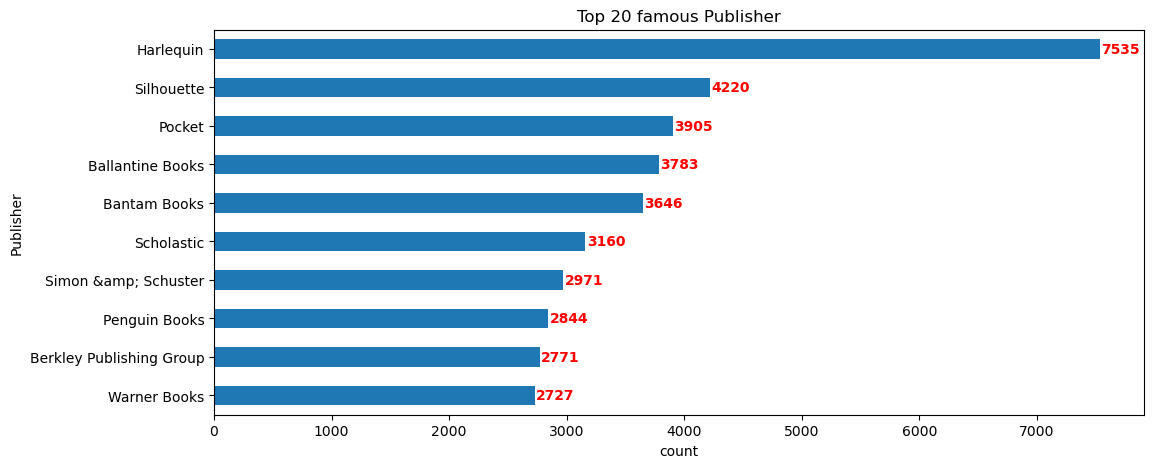

In [163]:
plt.figure(figsize=(12,5))
ax=books['Publisher'].value_counts().head(10).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Publisher')
plt.title('Top 20 famous Publisher')
for i,v in enumerate(list(books['Publisher'].value_counts().head(10).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')
# generates a horizontal bar chart 
# to visualize the top 20 famous publishers in the books dataset.

### Top 20 Famous Authors

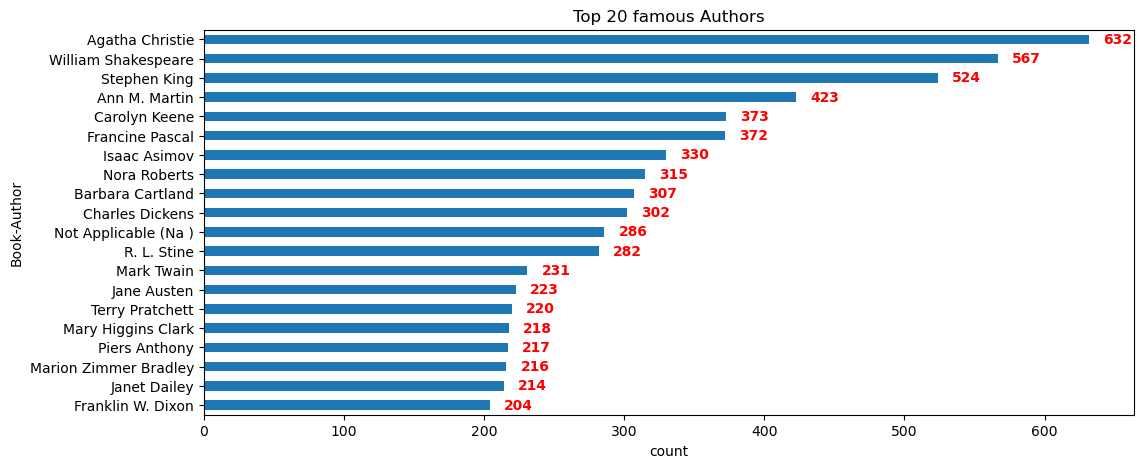

In [164]:
plt.figure(figsize=(12,5))
ax=books['Author'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.title('Top 20 famous Authors')
for i,v in enumerate(list(books['Author'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')
# generates a horizontal bar chart 
# to visualize the top 20 famous authors in the books dataset.

### Top 20 Famous Books

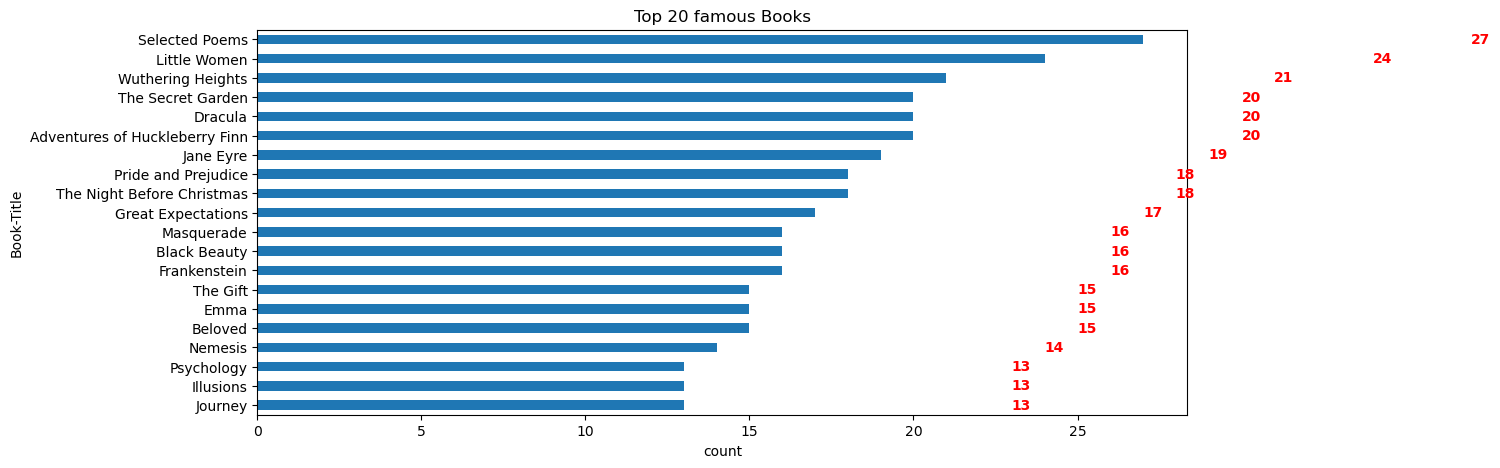

In [165]:
plt.figure(figsize=(12,5))
ax=books['Title'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book-Title')
plt.title('Top 20 famous Books')
for i,v in enumerate(list(books['Title'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')
# generates a horizontal bar chart  
# to visualize the top 20 famous books in the books dataset.

# Number of Books Published per Year

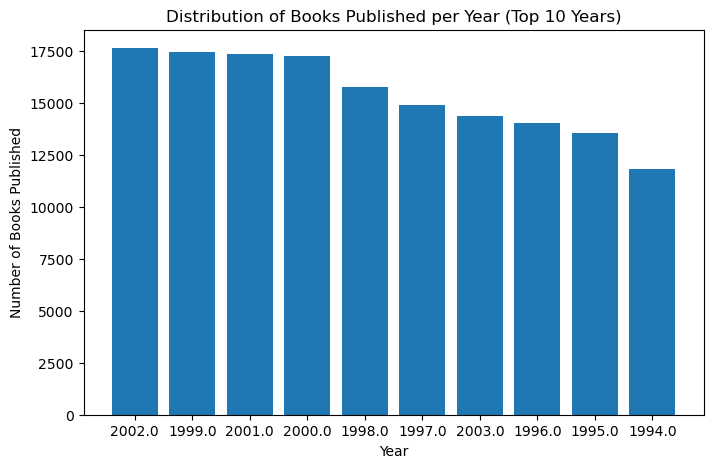

In [166]:
# Convert the 'Year' column to integers (assuming it's initially stored as strings)
books['Year'] = pd.to_numeric(books['Year'], errors='coerce')

# Filter out rows with invalid year values (NaN after conversion)
books = books.dropna(subset=['Year'])

# Count the number of books published per year
yearly_counts = books['Year'].value_counts().sort_index()

# Get the top 10 years
top_10_years = yearly_counts.nlargest(10)

# Create a bar chart for the top 10 years
plt.figure(figsize=(8,5))
plt.bar(top_10_years.index.astype(str), top_10_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.title('Distribution of Books Published per Year (Top 10 Years)')

plt.show()


Most no of books got published in year 2002

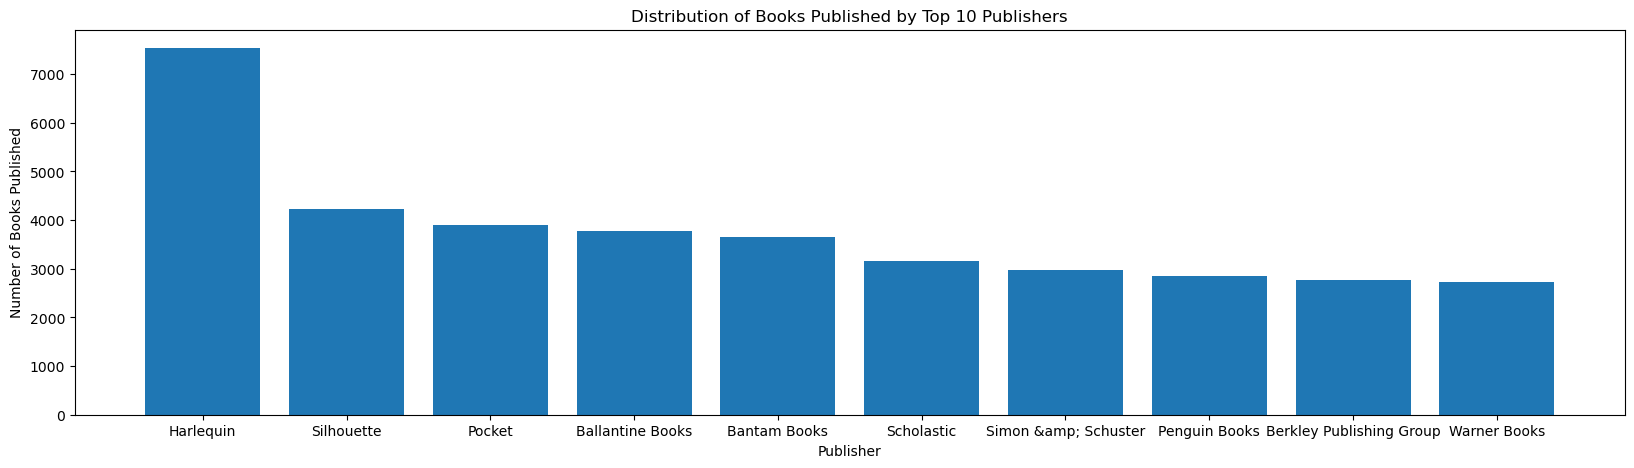

In [167]:
# Group the data by publisher and count the number of books for each publisher
publisher_counts = books['Publisher'].value_counts()

# Get the top 10 publishers with the most books
top_10_publishers = publisher_counts.nlargest(10)

# Create a bar chart for the top 10 publishers
plt.figure(figsize=(20, 5))
plt.bar(top_10_publishers.index, top_10_publishers.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Books Published')
plt.title('Distribution of Books Published by Top 10 Publishers')

plt.show()


Harlequin publisher is the topmost publisher

# Users dataset importing And processing

In [168]:
# Now load the users from a CSV file into a Pandas DataFrame called users
users = pd.read_csv('Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\HP\AppData\Local\Temp\ipykernel_11496\1387259610.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')


In [169]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [170]:
users.shape

(278858, 3)

In [171]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',},inplace=True)

In [172]:
users.head(2)

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


## Visualizations for 'Users' Dataset

### Countries with Number of Readers

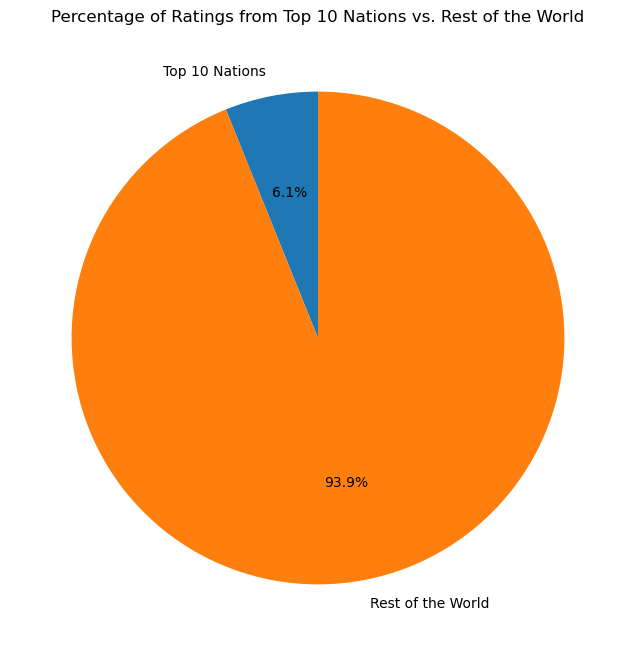

In [173]:
# Calculate the number of readers per country
country_counts = users['Location'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Calculate the total number of readers in the top 10 countries
total_top_10 = top_10_countries.sum()

# Calculate the number of readers in the rest of the world
rest_of_world = country_counts.sum() - total_top_10

# Create data for the pie chart
data = [total_top_10, rest_of_world]
labels = ['Top 10 Nations', 'Rest of the World']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Ratings from Top 10 Nations vs. Rest of the World')

plt.show()


### Age of users who reads most number of Books

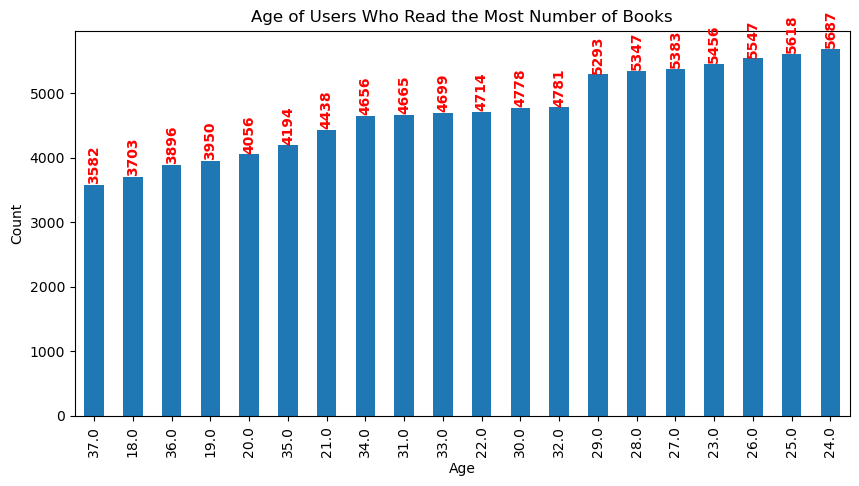

In [174]:
plt.figure(figsize=(10, 5))
ax = users['Age'].value_counts().head(20).sort_values().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age of Users Who Read the Most Number of Books')

for i, v in enumerate(list(users['Age'].value_counts().head(20).sort_values())):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', color='red', fontweight='bold', rotation=90)

plt.show()

# generates a vertial bar chart 
#to visualize the age groups that read the most number of books 
# in the users dataset.


Categorizing the age column by 'Children', 'Teenage', 'Young-adults','Middle-aged adults','Old-Aged adults','Very-Aged adults'


In [175]:
edges = [0, 12, 20, 40, 60, 100, 120]
names = ['Children', 'Teenage', 'Young-adults', 'Middle-aged adults', 'Old-Aged adults', 'Very-Aged adults']
users['Age_category'] = pd.cut(users['Age'], edges, labels=names)

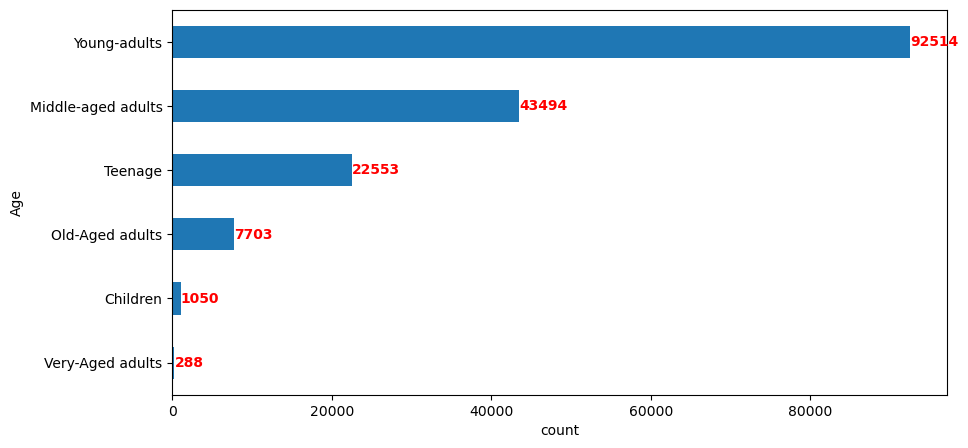

In [176]:
plt.figure(figsize=(10,5))
ax=users['Age_category'].value_counts().head(10).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Age')

for i,v in enumerate(list(users['Age_category'].value_counts().head(10).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')
# Most no of book users are Young adults followed by middle age adults 

# Users dataset importing And processing

In [177]:
# Now load the third dataframe
ratings = pd.read_csv('Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\HP\AppData\Local\Temp\ipykernel_11496\1153714094.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')


In [178]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [179]:
ratings.shape

(1149780, 3)

In [180]:
# Lets rename some weird columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'ratings'},inplace=True)

In [181]:
ratings.head(2)

,user_id,ISBN,ratings
0,276725,034545104X,0
1,276726,0155061224,5


### Conclusion:
Now we have 3 dataframes
- books
- users
- ratings

In [182]:
print(books.shape, users.shape, ratings.shape, sep='\n')

(271357, 6)
(278858, 4)
(1149780, 3)


In [183]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [184]:
ratings['user_id'].value_counts().shape

(105283,)

In [185]:
ratings['user_id'].unique().shape

(105283,)

# Collaborative Filtering Based Recommender System

In [186]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200
# filters users who have rated more than 200 books and retains only their ratings

In [187]:
x[x].shape

(899,)

In [188]:
y= x[x].index

In [189]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [190]:
ratings = ratings[ratings['user_id'].isin(y)]

In [191]:
ratings.head()

,user_id,ISBN,ratings
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [192]:
ratings.shape

(526356, 3)

## Visualization for 'Ratings' Dataset 

### Number of times specific rating is given

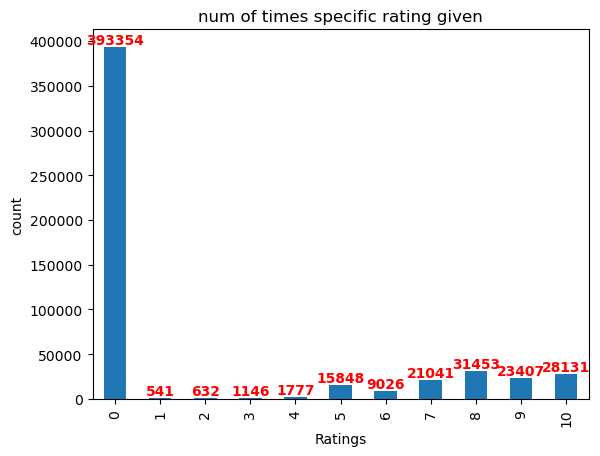

In [193]:
ax=ratings['ratings'].value_counts().head(20).sort_index().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('count')
plt.title('num of times specific rating given')
for i,v in enumerate(list(ratings['ratings'].value_counts().head(20).sort_index())):
    ax.text(i,v+10,str(v),ha='center',va='bottom',color='red',fontweight='bold')

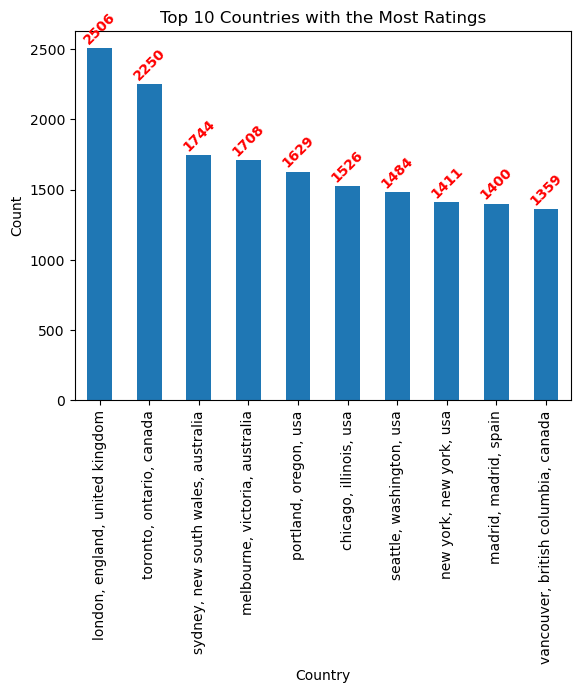

In [194]:
ax = users['Location'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with the Most Ratings')

for i, v in enumerate(users['Location'].value_counts().head(10)):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', color='red', fontweight='bold', rotation=45)

plt.show()

# Popularity Based Recommender System

In [195]:
ratings_with_books = ratings.merge(books, on='ISBN')
#  merges the ratings dataset with the books dataset based on the 'ISBN' column.

In [196]:
ratings_with_books.head()

,user_id,ISBN,ratings,Title,Author,Year,Publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [197]:
ratings_with_books.shape

(487668, 8)

In [198]:
number_rating = ratings_with_books.groupby('Title')['ratings'].count().reset_index()
#  counts the number of ratings each book has received and creates a new DataFrame with the count.

In [199]:
number_rating.head()

,Title,ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [200]:
number_rating.rename(columns={'ratings':'num_of_rating'},inplace=True)

In [201]:
number_rating.head()

,Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [202]:
final_rating = ratings_with_books.merge(number_rating, on='Title')

In [203]:
final_rating.head()

,user_id,ISBN,ratings,Title,Author,Year,Publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [204]:
final_rating.shape

(487668, 9)

In [205]:
# Lets take those books which got at least 50 rating of user
final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [206]:
final_rating.head()

,user_id,ISBN,ratings,Title,Author,Year,Publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [207]:
final_rating.shape

(61853, 9)

In [208]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','Title'],inplace=True)

In [209]:
final_rating.shape

(59850, 9)

In [210]:
# merge ratings and users dataset
data=ratings.merge(users,left_on="user_id",right_on="user_id",how="left")

In [211]:
# merge ratings and users dataset with books
data=data.merge(books,left_on="ISBN",right_on="ISBN",how="left")

In [212]:
data

,user_id,ISBN,ratings,Location,Age,Age_category,Title,Author,Year,Publisher,image_url
0,277427,002542730X,10,"gilbert, arizona, usa",48.0,Middle-aged adults,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,"gilbert, arizona, usa",48.0,Middle-aged adults,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,"gilbert, arizona, usa",48.0,Middle-aged adults,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"gilbert, arizona, usa",48.0,Middle-aged adults,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,"gilbert, arizona, usa",48.0,Middle-aged adults,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...,...
526351,275970,3829021860,0,"pittsburgh, pennsylvania, usa",46.0,Middle-aged adults,The Penis Book,Joseph Cohen,1999.0,Konemann,http://images.amazon.com/images/P/3829021860.0...
526352,275970,4770019572,0,"pittsburgh, pennsylvania, usa",46.0,Middle-aged adults,Musashi,Eiji Yoshikawa,1995.0,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...
526353,275970,896086097,0,"pittsburgh, pennsylvania, usa",46.0,Middle-aged adults,NaN,NaN,NaN,NaN,NaN
526354,275970,9626340762,8,"pittsburgh, pennsylvania, usa",46.0,Middle-aged adults,Northanger Abbey (Classic Literature with Clas...,Jane Austen,1996.0,Naxos Audiobooks Ltd.,http://images.amazon.com/images/P/9626340762.0...


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526356 entries, 0 to 526355
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   user_id       526356 non-null  int64   
 1   ISBN          526356 non-null  object  
 2   ratings       526356 non-null  int64   
 3   Location      526356 non-null  object  
 4   Age           401626 non-null  float64 
 5   Age_category  400670 non-null  category
 6   Title         487668 non-null  object  
 7   Author        487668 non-null  object  
 8   Year          487668 non-null  float64 
 9   Publisher     487666 non-null  object  
 10  image_url     487668 non-null  object  
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 44.7+ MB


In [214]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='user_id', index='Title', values= 'ratings')
# creates a pivot table where rows represent books, columns represent users, and the values are ratings.

In [215]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [216]:
book_pivot.shape

(742, 888)

In [217]:
book_pivot.fillna(0, inplace=True)

In [218]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

Content BAsed

In [219]:
from scipy.sparse import csr_matrix
#  converts the pivot table into a sparse matrix, which will be used for training the clustering model.

In [220]:
book_sparse = csr_matrix(book_pivot)

In [221]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [227]:
# Now import our clustering algoritm which is Nearest Neighbors this is an supervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric="cosine",algorithm= 'brute')
# imports the Nearest Neighbors clustering algorithm and fits it to the sparse matrix.

In [230]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [224]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )
# finds the nearest neighbors to a given book (at index 237) and provides book recommendations based on similarity.

In [231]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [232]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [233]:
book_pivot.iloc[241,:]

user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Sorcerer's Stone (Book 1), Length: 888, dtype: float64

In [234]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='Title')


In [235]:
book_pivot.index[3]

'4 Blondes'

In [236]:
#keeping books name
book_names = book_pivot.index

In [237]:
book_names[2]

'2nd Chance'

In [238]:
np.where(book_pivot.index == '4 Blondes')[0][0]

3

# find url

In [239]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['Title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [240]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [241]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])

In [242]:
book_name[0]

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='Title')

In [243]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_rating['Title'] == name)[0][0]
    ids_index.append(ids)

In [244]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


In [245]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))
# This code saves the clustering model and related data into pickle files for future use.

# Testing model

In [246]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [252]:
book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(book_name)

You searched 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggestion books are: 

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
